In [1]:
import time

import numpy as np
import pandas as pd
import preprocessing
import seaborn
from matplotlib import pyplot as plt

In [2]:
print('Reading data...')
start_time = time.time()
train_set = pd.read_csv('./data/training_set_VU_DM.csv')
test_set = pd.read_csv('./data/test_set_VU_DM.csv')
print(f'Data read in {time.time() - start_time} s')

Reading data...
Data read in 38.02077507972717 s


In [3]:
data = pd.concat([train_set, test_set], ignore_index=True)
# print(data.head())
# print(data.describe())
nan_data_info = pd.DataFrame({'NaN Count': data.isna().sum(), 'Data Type': data.dtypes})
print(nan_data_info)

                             NaN Count Data Type
srch_id                              0     int64
date_time                            0    object
site_id                              0     int64
visitor_location_country_id          0     int64
visitor_hist_starrating        9412233   float64
visitor_hist_adr_usd           9409918   float64
prop_country_id                      0     int64
prop_id                              0     int64
prop_starrating                      0     int64
prop_review_score                14630   float64
prop_brand_bool                      0     int64
prop_location_score1                 0   float64
prop_location_score2           2178380   float64
prop_log_historical_price            0   float64
position                       4959183   float64
price_usd                            0   float64
promotion_flag                       0     int64
srch_destination_id                  0     int64
srch_length_of_stay                  0     int64
srch_booking_window 

In [4]:
preprocessing.parse_date(data)

Preprocessing data...
329


C:\Users\china\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\china\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch [10/80], Loss: 0.5717
Epoch [20/80], Loss: 0.5718
Epoch [30/80], Loss: 0.5716
Epoch [40/80], Loss: 0.5717
Epoch [50/80], Loss: 0.5717
Epoch [60/80], Loss: 0.5718
Epoch [70/80], Loss: 0.5718
Epoch [80/80], Loss: 0.5718


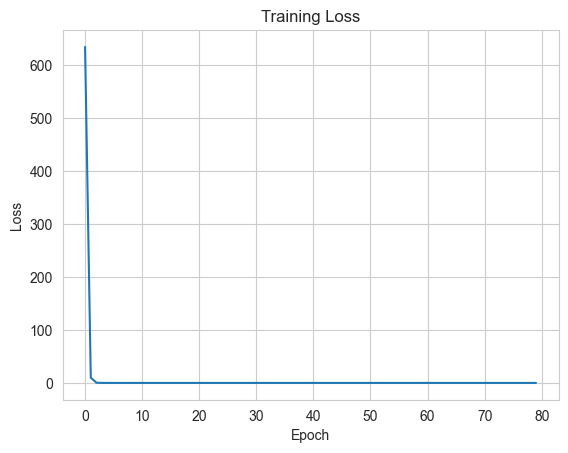

331


C:\Users\china\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\china\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([26])) that is different to the input size (torch.Size([26, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch [10/120], Loss: 80.3143
Epoch [20/120], Loss: 79.6542
Epoch [30/120], Loss: 78.8514
Epoch [40/120], Loss: 76.9641
Epoch [50/120], Loss: 75.9378
Epoch [60/120], Loss: 74.8723
Epoch [70/120], Loss: 73.4982
Epoch [80/120], Loss: 72.7958
Epoch [90/120], Loss: 70.9658
Epoch [100/120], Loss: 70.8132
Epoch [110/120], Loss: 70.8099
Epoch [120/120], Loss: 70.8080


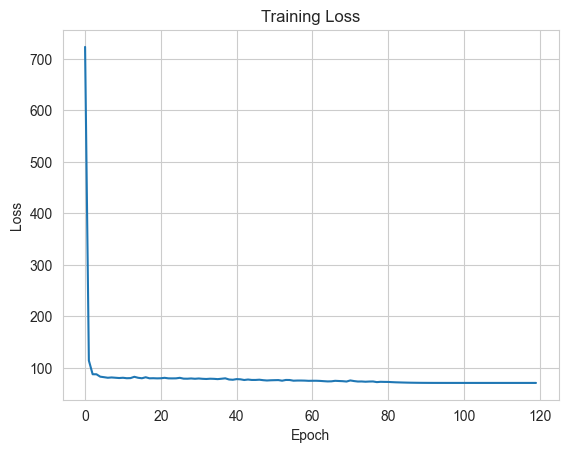

In [5]:
print('Preprocessing data...')
features = ['visitor_location_country_id', 'site_id', 'srch_id', 'days']

preprocessing.fill_by_nn(data, features, 'visitor_hist_starrating', epoch_num=80)
preprocessing.fill_by_nn(data, features+['visitor_hist_starrating'], 'visitor_hist_adr_usd', epoch_num=120)

In [6]:
print(data.prop_review_score.isnull().sum())
feature_usd = ['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'prop_country_id', 'promotion_flag']
preprocessing.fill_by_regressor(data, regressor='ridge', feature_columns=feature_usd,target_column='prop_review_score')

14630
Score: [-0.96867127 -1.12622718 -1.22983656 -1.30141502 -1.37649044]
Mean MAE score -1.2005280938276641


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,days
0,1,2013-04-04 08:32:15,12,187,3.114692,153.374863,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
1,1,2013-04-04 08:32:15,12,187,2.840411,153.378357,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
2,1,2013-04-04 08:32:15,12,187,3.090666,153.375168,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
3,1,2013-04-04 08:32:15,12,187,2.686417,153.380325,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0.0,NaN,0.0,154
4,1,2013-04-04 08:32:15,12,187,3.683291,153.367615,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917526,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917527,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917528,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201


In [10]:
print(data.prop_location_score2.isnull().sum())
feature_usd = ['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'prop_country_id', 'promotion_flag']
# feature_usd += ['prop_location_score2']
preprocessing.fill_by_regressor(data, regressor='ridge', feature_columns=feature_usd, target_column='prop_location_score2')

2178380
Score: [-0.10812406 -0.11039026 -0.1135728  -0.11604558 -0.11769822]
Mean MAE score -0.11316618398264267


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,days
0,1,2013-04-04 08:32:15,12,187,3.114692,153.374863,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
1,1,2013-04-04 08:32:15,12,187,2.840411,153.378357,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
2,1,2013-04-04 08:32:15,12,187,3.090666,153.375168,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
3,1,2013-04-04 08:32:15,12,187,2.686417,153.380325,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0.0,NaN,0.0,154
4,1,2013-04-04 08:32:15,12,187,3.683291,153.367615,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917526,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917527,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917528,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201


In [11]:
feature_usd = ['prop_country_id', 'prop_location_score1', 'prop_location_score2', 'visitor_location_country_id']
preprocessing.fill_by_regressor(data, regressor='ridge', feature_columns=feature_usd, target_column='orig_destination_distance')

Score: [-1264.6168855  -1267.21879614 -1266.38806267 -1269.52594067
 -1265.28785126]
Mean MAE score -1266.6075072464025


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,days
0,1,2013-04-04 08:32:15,12,187,3.114692,153.374863,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
1,1,2013-04-04 08:32:15,12,187,2.840411,153.378357,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
2,1,2013-04-04 08:32:15,12,187,3.090666,153.375168,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
3,1,2013-04-04 08:32:15,12,187,2.686417,153.380325,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0.0,NaN,0.0,154
4,1,2013-04-04 08:32:15,12,187,3.683291,153.367615,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,32019,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917526,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,33959,4,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917527,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,35240,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201
9917528,332787,2013-05-21 11:06:37,24,216,3.433037,153.482971,117,94437,4,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201


In [12]:
data['ump'] = np.exp(data.prop_log_historical_price) - data.price_usd
data['price_diff'] = data.visitor_hist_adr_usd - data.price_usd
data['starrating_diff'] = data.visitor_hist_adr_usd - data.prop_starrating
data['count_window'] = data.srch_room_count * max(data.srch_booking_window) + data.srch_booking_window

In [13]:
min_affinity_score = np.nanmin(data.srch_query_affinity_score)
fill_value = 2 * min_affinity_score
print(fill_value)
tmp_sqa_score = data.srch_query_affinity_score
preprocessing.preprocess_null_fill(data, columns=['srch_query_affinity_score'], fill_value=fill_value)

-653.135


In [14]:
preprocessing.merge_comp(data)

In [15]:
data['score'] = data.click_bool + data.booking_bool * 5
data_filled = data.drop(['click_bool', 'booking_bool', 'gross_bookings_usd', 'position', 'date_time'], axis=1)

mean_columns = ['comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff']
preprocessing.preprocess_null_fill_mean(data_filled, columns=mean_columns)

In [16]:
# preprocessing.preprocess_null_fill_mean(data_filled, columns=mean_columns)
nan_data_info = pd.DataFrame({'NaN Count': data_filled.isna().sum(), 'Data Type': data_filled.dtypes})
print(nan_data_info)
print(data_filled.describe())

                             NaN Count Data Type
srch_id                              0     int64
site_id                              0     int64
visitor_location_country_id          0     int64
visitor_hist_starrating              0   float64
visitor_hist_adr_usd                 0   float64
prop_country_id                      0     int64
prop_id                              0     int64
prop_starrating                      0     int64
prop_review_score                    0   float64
prop_brand_bool                      0     int64
prop_location_score1                 0   float64
prop_location_score2                 0   float64
prop_log_historical_price            0   float64
price_usd                            0   float64
promotion_flag                       0     int64
srch_destination_id                  0     int64
srch_length_of_stay                  0     int64
srch_booking_window                  0     int64
srch_adults_count                    0     int64
srch_children_count 

In [17]:
numeric_cols = ['prop_starrating', 'prop_review_score', 'prop_location_score2','prop_brand_bool','prop_log_historical_price','visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff']
# data_filled=data_filled
# combined_df = pd.concat([data_filled, data_filled1], ignore_index=True)
grouped_df = data_filled.groupby('prop_id')[numeric_cols].agg(['mean', 'median'])
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
combined_df = data_filled.merge(grouped_df, on='prop_id', how='left')

['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'days', 'ump', 'price_diff', 'starrating_diff', 'count_window', 'comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff', 'score', 'prop_starrating_mean', 'prop_starrating_median', 'prop_review_score_mean', 'prop_review_score_median', 'prop_location_score2_mean', 'prop_location_score2_median', 'prop_brand_bool_mean', 'prop_brand_bool_median', 'prop_log_historical_price_mean', 'prop_log_historical_price_median', 'visitor_hist_starrating_mean', 'visitor_hist

In [24]:
# train_set[test_set.columns] = data[test_set.columns]
# test_set = data[test_set.columns]
# feature_usd = ['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'prop_country_id', 'promotion_flag', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff', 'orig_destination_distance', 'count_window', 'days', 'prop_brand_bool', 'site_id']
# model = preprocessing.predict_score(data_filled[:len(train_set)], feature_columns=feature_usd, target_column='score', model_name='lr')
# data_filled['lr_score'] = model.predict(data_filled[feature_usd])

features = combined_df.columns.tolist()
features.remove('score')
model = preprocessing.predict_score(combined_df[:len(train_set)], feature_columns=features, target_column='score', model_name='lr')
combined_df['lr_score'] = model.predict(combined_df[features])

LinearRegression() MSE: 2800.820287394009, MAE: 17.95812810446656.


In [25]:
print(combined_df.columns.tolist())

['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'days', 'ump', 'price_diff', 'starrating_diff', 'count_window', 'comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff', 'score', 'prop_starrating_mean', 'prop_starrating_median', 'prop_review_score_mean', 'prop_review_score_median', 'prop_location_score2_mean', 'prop_location_score2_median', 'prop_brand_bool_mean', 'prop_brand_bool_median', 'prop_log_historical_price_mean', 'prop_log_historical_price_median', 'visitor_hist_starrating_mean', 'visitor_hist

                                    srch_id   site_id  \
srch_id                            1.000000  0.003095   
site_id                            0.003095  1.000000   
visitor_location_country_id       -0.004266 -0.304294   
visitor_hist_starrating            0.000658  0.070026   
visitor_hist_adr_usd               0.002846  0.030054   
prop_country_id                   -0.000938 -0.313794   
prop_id                           -0.000414  0.003416   
prop_starrating                   -0.000764  0.174236   
prop_review_score                 -0.000834 -0.072739   
prop_brand_bool                   -0.001106 -0.195688   
prop_location_score1               0.000529  0.178140   
prop_location_score2               0.000399  0.062888   
prop_log_historical_price          0.000342  0.027698   
price_usd                         -0.001440  0.000188   
promotion_flag                    -0.000834  0.082957   
srch_destination_id               -0.000178  0.023303   
srch_length_of_stay            

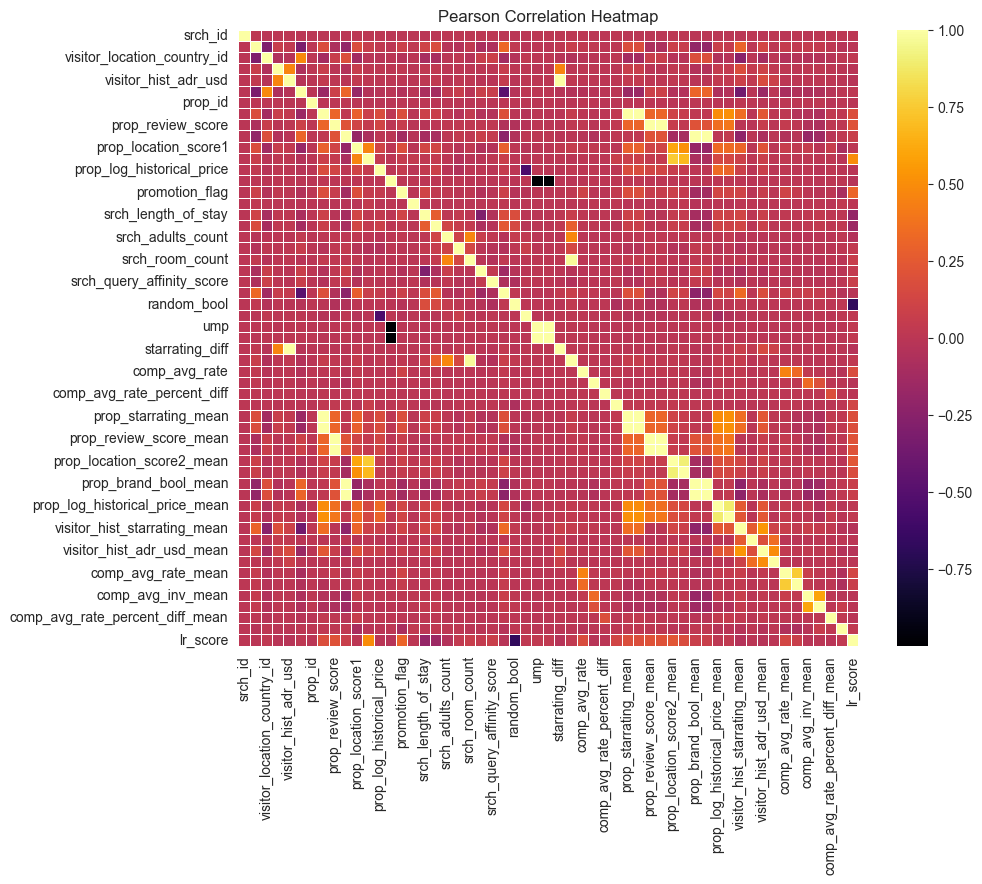

In [26]:
corr = combined_df.corr()
print(corr)

plt.figure(figsize=(10, 8))
seaborn.heatmap(corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [27]:
combined_df[:len(train_set)].to_csv('./data/filled_training_set1.csv', index=False)
combined_df[len(train_set):].to_csv('./data/filled_test_set.csv', index=False)

In [28]:
high_corr = corr[abs(corr['score'])>0.003]['score']
print(high_corr)

prop_starrating                      0.023979
prop_review_score                    0.026337
prop_brand_bool                      0.008460
prop_location_score2                 0.067557
promotion_flag                       0.038078
srch_length_of_stay                 -0.019680
srch_booking_window                 -0.015873
srch_adults_count                   -0.003494
srch_children_count                  0.004459
srch_room_count                      0.008052
srch_saturday_night_bool             0.004779
srch_query_affinity_score            0.008487
random_bool                         -0.072455
count_window                         0.003922
comp_avg_rate                        0.019464
comp_avg_inv                        -0.003543
score                                1.000000
prop_starrating_mean                 0.023979
prop_starrating_median               0.023979
prop_review_score_mean               0.026339
prop_review_score_median             0.026338
prop_location_score2_mean         